In [1]:
# Installing packages to jupyter notebook environment

!pip install matplotlib
!pip install statsmodels
!pip install pandas
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import seaborn as sns

In [3]:
# Importing the downloaded CSV data

df = pd.read_csv('/home/linkie/Desktop/Projects/craigslist_vehicles.csv/craigslist_vehicles.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    426880 non-null  int64  
 1   id            426880 non-null  int64  
 2   url           426880 non-null  object 
 3   region        426880 non-null  object 
 4   region_url    426880 non-null  object 
 5   price         426880 non-null  int64  
 6   year          425675 non-null  float64
 7   manufacturer  409234 non-null  object 
 8   model         421603 non-null  object 
 9   condition     252776 non-null  object 
 10  cylinders     249202 non-null  object 
 11  fuel          423867 non-null  object 
 12  odometer      422480 non-null  float64
 13  title_status  418638 non-null  object 
 14  transmission  424324 non-null  object 
 15  VIN           265838 non-null  object 
 16  drive         296313 non-null  object 
 17  size          120519 non-null  object 
 18  type

In [5]:
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,removal_date
0,362773,7307679724,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00
1,362712,7311833696,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00
2,362722,7311441996,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4900,2006.0,toyota,camry,excellent,...,sedan,silver,https://images.craigslist.org/00808_5FkOw2aGjA...,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,NaN,tx,32.453848,-99.787900,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00
3,362771,7307680715,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-04-26 00:00:00+00:00
4,362710,7311834578,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-05-12 00:00:00+00:00


In [6]:
df.dtypes

Unnamed: 0        int64
id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
removal_date     object
dtype: object

In [7]:
df.shape

(426880, 28)

In [8]:
df.isna()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,removal_date
0,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
426876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
426877,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
426878,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False


In [9]:
# Dropping the columns that won't be needed

new_df = df.drop(columns=['url', 'region_url', 'image_url', 'Unnamed: 0', 'lat', 'long', 'county'])
new_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,transmission,VIN,drive,size,type,paint_color,description,state,posting_date,removal_date
0,7307679724,abilene,4500,2002.0,bmw,x5,NaN,NaN,gas,184000.0,...,automatic,NaN,NaN,NaN,NaN,NaN,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",tx,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00
1,7311833696,abilene,4500,2002.0,bmw,x5,NaN,NaN,gas,184000.0,...,automatic,NaN,NaN,NaN,NaN,NaN,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",tx,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00
2,7311441996,abilene,4900,2006.0,toyota,camry,excellent,4 cylinders,gas,184930.0,...,automatic,NaN,fwd,NaN,sedan,silver,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,tx,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00
3,7307680715,abilene,6500,2008.0,ford,expedition,NaN,NaN,gas,206000.0,...,automatic,NaN,NaN,NaN,NaN,NaN,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,tx,2021-04-16 00:00:00+00:00,2021-04-26 00:00:00+00:00
4,7311834578,abilene,6500,2008.0,ford,expedition,NaN,NaN,gas,206000.0,...,automatic,NaN,NaN,NaN,NaN,NaN,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,tx,2021-04-24 00:00:00+00:00,2021-05-12 00:00:00+00:00


In [10]:
# Consolidating data types for the columns

numerical_columns = new_df.select_dtypes(include=['number'])
categorical_columns = new_df.select_dtypes(exclude=['number'])

In [11]:
new_df[numerical_columns.columns] = new_df[numerical_columns.columns].fillna(new_df[numerical_columns.columns].median())

In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          426880 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      426880 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  description   426810 non-null  object 
 18  stat

In [13]:
new_df[categorical_columns.columns] = new_df[categorical_columns.columns].fillna(new_df[categorical_columns.columns].mode().iloc[0])

In [14]:
# Converting the posting date column to a datatime object

new_df['posting_date'] = pd.to_datetime(new_df['posting_date'])

In [15]:
# Setting the posting date as the dataframe index

new_df.set_index('posting_date', inplace=True)

In [16]:
# Summary Statistics

new_df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,426880.000000,4.268800e+05
mean,7.311487e+09,7.519903e+04,2011.240173,9.791454e+04
std,4.473170e+06,1.218228e+07,9.439234,2.127801e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.813000e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.330000e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [17]:
new_df.shape

(426880, 20)

In [18]:
# Exploring the unique regions

unique_regions = new_df['region'].unique()
unique_regions

array(['abilene', 'akron / canton', 'albany', 'albuquerque',
       'clovis / portales', 'lehigh valley', 'altoona-johnstown',
       'amarillo', 'southwest KS', 'ames', 'anchorage / mat-su',
       'annapolis', 'ann arbor', 'appleton-oshkosh-FDL', 'asheville',
       'ashtabula', 'athens', 'west virginia (old)', 'huntington-ashland',
       'atlanta', 'auburn', 'augusta', 'austin', 'bakersfield',
       'baltimore', 'baton rouge', 'battle creek',
       'beaumont / port arthur', 'bellingham', 'bemidji', 'bend',
       'bowling green', 'birmingham', 'meridian', 'southwest TX',
       'billings', 'binghamton', 'bismarck', 'eastern montana',
       'new river valley', 'bloomington', 'bloomington-normal', 'boise',
       'elko', 'boone', 'boston', 'boulder', 'eastern CO', 'bozeman',
       'brainerd', 'brownsville', 'brunswick', 'buffalo', 'butte',
       'cape cod / islands', 'southern illinois', 'catskills',
       'cedar rapids', 'central louisiana', 'deep east texas',
       'central 

In [19]:
new_df.dtypes

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
description      object
state            object
removal_date     object
dtype: object

Text(0, 0.5, 'Mean Price')

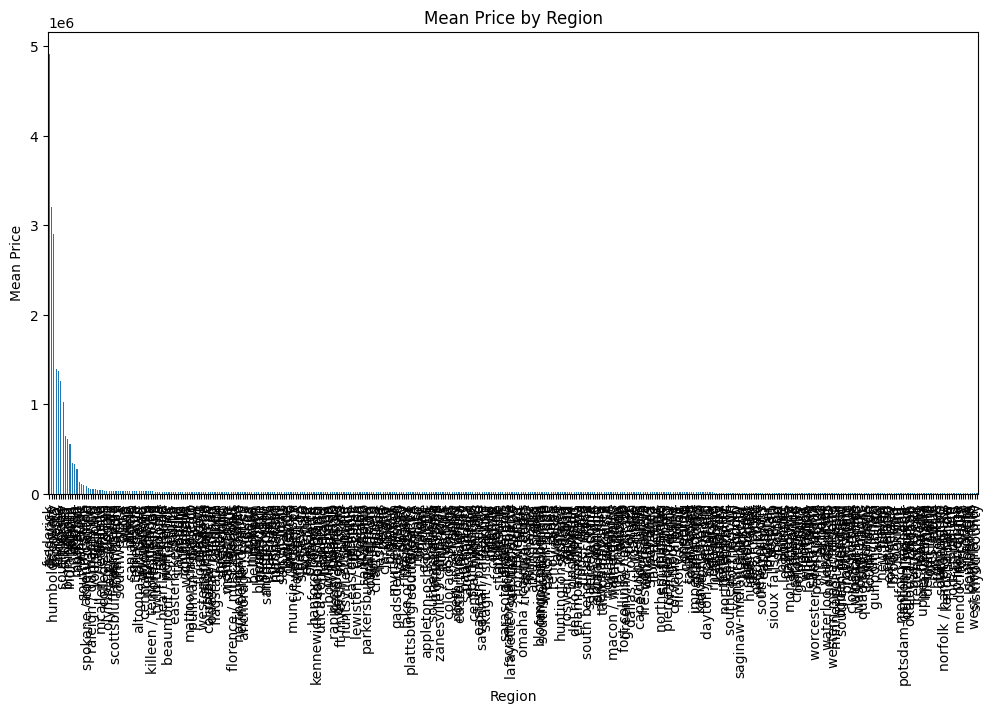

In [20]:
# Group by region and calculate the mean price

region_grouped = new_df.groupby('region')['price'].mean().sort_values(ascending=False)
region_grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Price by Region')
plt.xlabel('Region')
plt.ylabel('Mean Price')

Text(0, 0.5, 'Median Price')

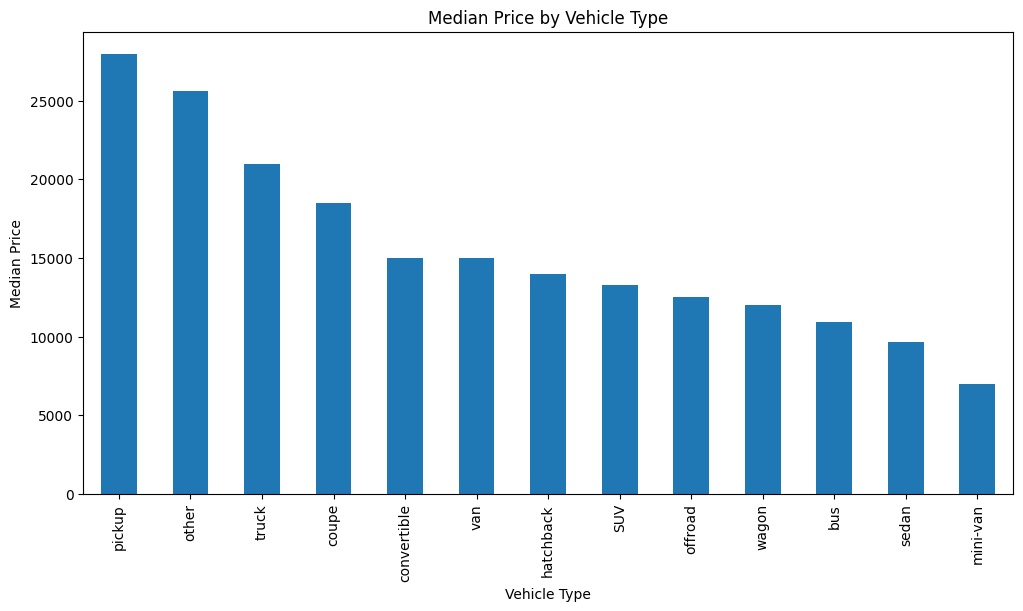

In [21]:
# Group by vehicle type and calculate the median price

vehicle_type_grouped = new_df.groupby('type')['price'].median().sort_values(ascending=False)
vehicle_type_grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Median Price by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Median Price')

/tmp/ipykernel_59206/173922927.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = new_df.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

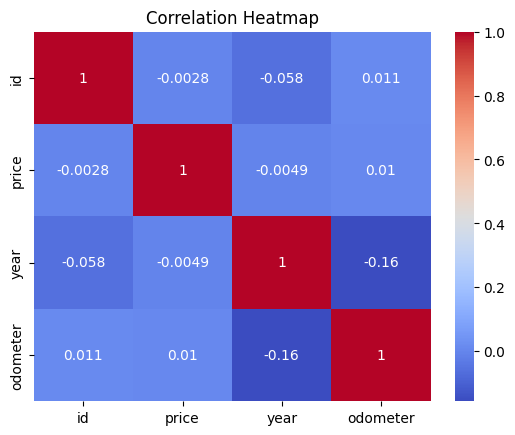

In [22]:
# Correlation Analysis:

correlation_matrix = new_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

In [23]:
# Fit an ARIMA model

model = ARIMA(new_df['price'], order=(5, 1, 0))
model_fit = model.fit()
print('Model Fit Summary: ', model_fit.summary())

# Forecast with the ARIMA model
forecast = model_fit.forecast(steps=10)
print('Forecast: ', model_fit.summary())

/home/linkie/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/linkie/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/linkie/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/linkie/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/link

Model Fit Summary:                                 SARIMAX Results                                
Dep. Variable:                  price   No. Observations:               426880
Model:                 ARIMA(5, 1, 0)   Log Likelihood            -7602263.552
Date:                Fri, 19 Jan 2024   AIC                       15204539.103
Time:                        15:09:06   BIC                       15204604.889
Sample:                             0   HQIC                      15204557.850
                             - 426880                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7831   2.57e-05  -3.05e+04      0.000      -0.783      -0.783
ar.L2         -0.6307   4.08e-05  -1.55e+04      0.000      -0.631      -0.631
ar.L3         -0.4749   4.55e-05

/home/linkie/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/linkie/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Forecast:                                 SARIMAX Results                                
Dep. Variable:                  price   No. Observations:               426880
Model:                 ARIMA(5, 1, 0)   Log Likelihood            -7602263.552
Date:                Fri, 19 Jan 2024   AIC                       15204539.103
Time:                        15:09:16   BIC                       15204604.889
Sample:                             0   HQIC                      15204557.850
                             - 426880                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7831   2.57e-05  -3.05e+04      0.000      -0.783      -0.783
ar.L2         -0.6307   4.08e-05  -1.55e+04      0.000      -0.631      -0.631
ar.L3         -0.4749   4.55e-05  -1.04e+

In [24]:
# Fit an Exponential Smoothing model

time_series = new_df.set_index(new_df.index)['price']
time_series.dropna()


train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7)
fit_model = model.fit()

predictions = fit_model.forecast(len(test))

/home/linkie/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/linkie/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/linkie/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/linkie/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/linkie/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py

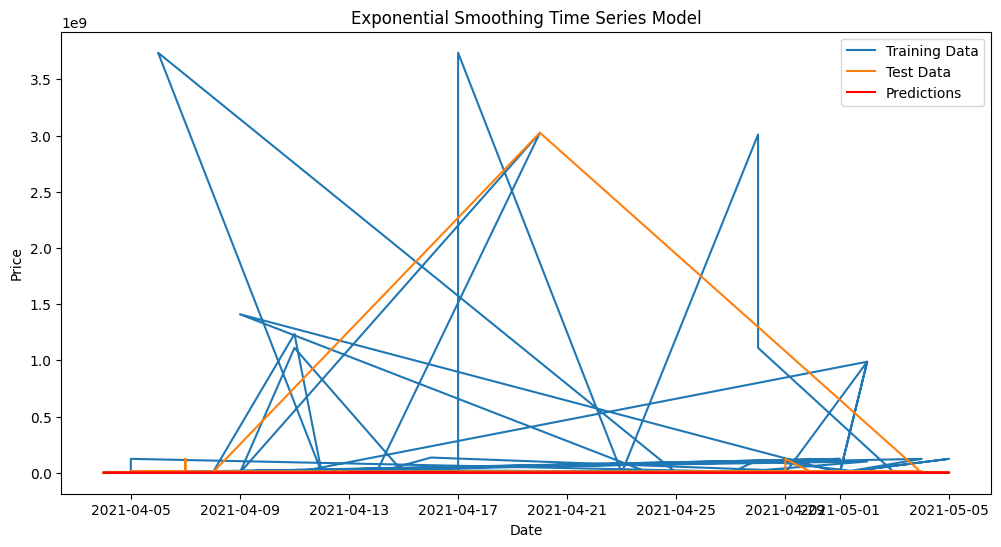

In [25]:
# Plot the results

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.title('Exponential Smoothing Time Series Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()